In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import time
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import roc_curve, accuracy_score, precision_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.feature_selection import RFE, SelectPercentile, f_classif, VarianceThreshold
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from math import sqrt
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.feature_selection import RFE, SelectFromModel
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [2]:
df = pd.read_csv("Nashville_housing_data_2013_2016.csv")

In [3]:
df.head()

,Column1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,24-01-13,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Over
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,11-01-13,191500,20130118-0006337,...,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,Over
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,18-01-13,202000,20130124-0008033,...,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,Over
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,18-01-13,32000,20130128-0008863,...,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,Under
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,23-01-13,102000,20130131-0009929,...,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,Under


In [4]:
df.shape

(56636, 32)

Shape of your Data Set: (56636, 32)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  8
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  1
    32 Predictors classified...
        This does not include the Target column(s)
        11 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 55


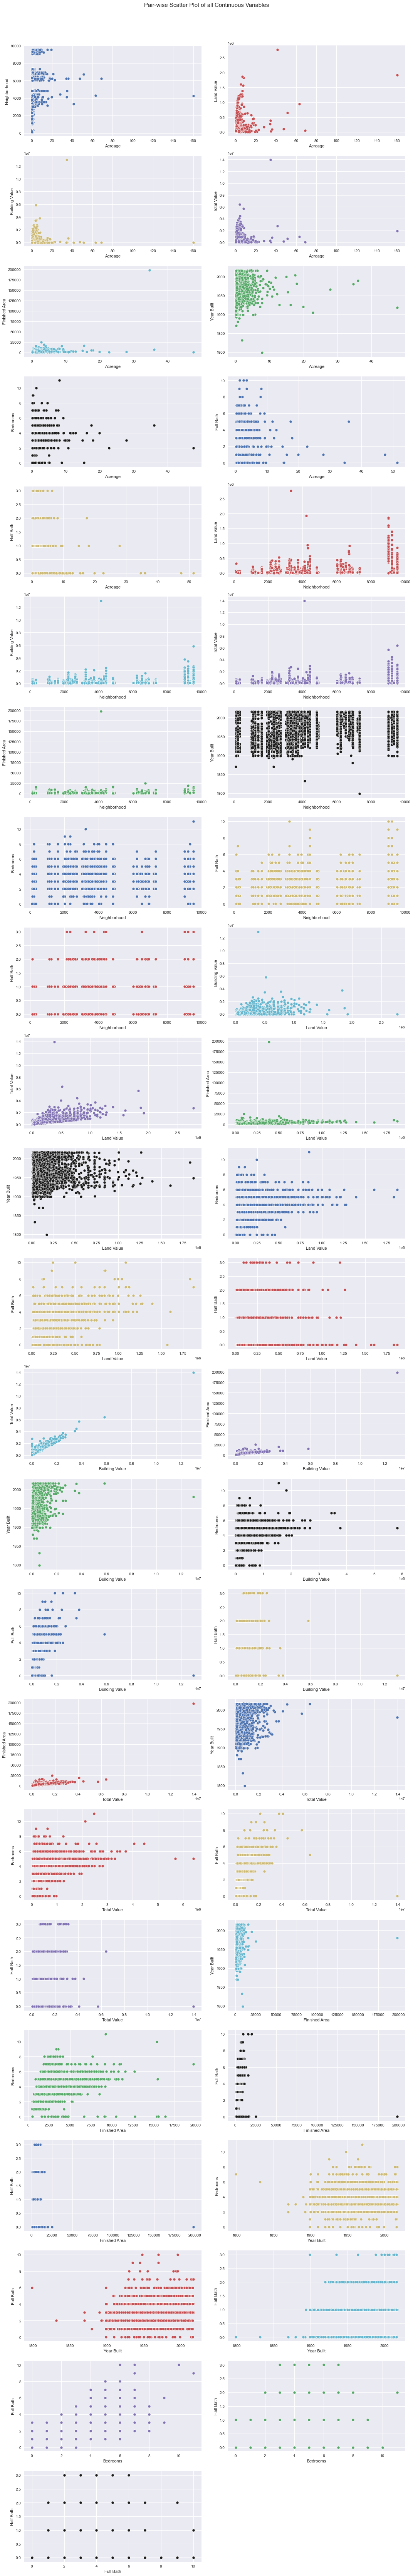

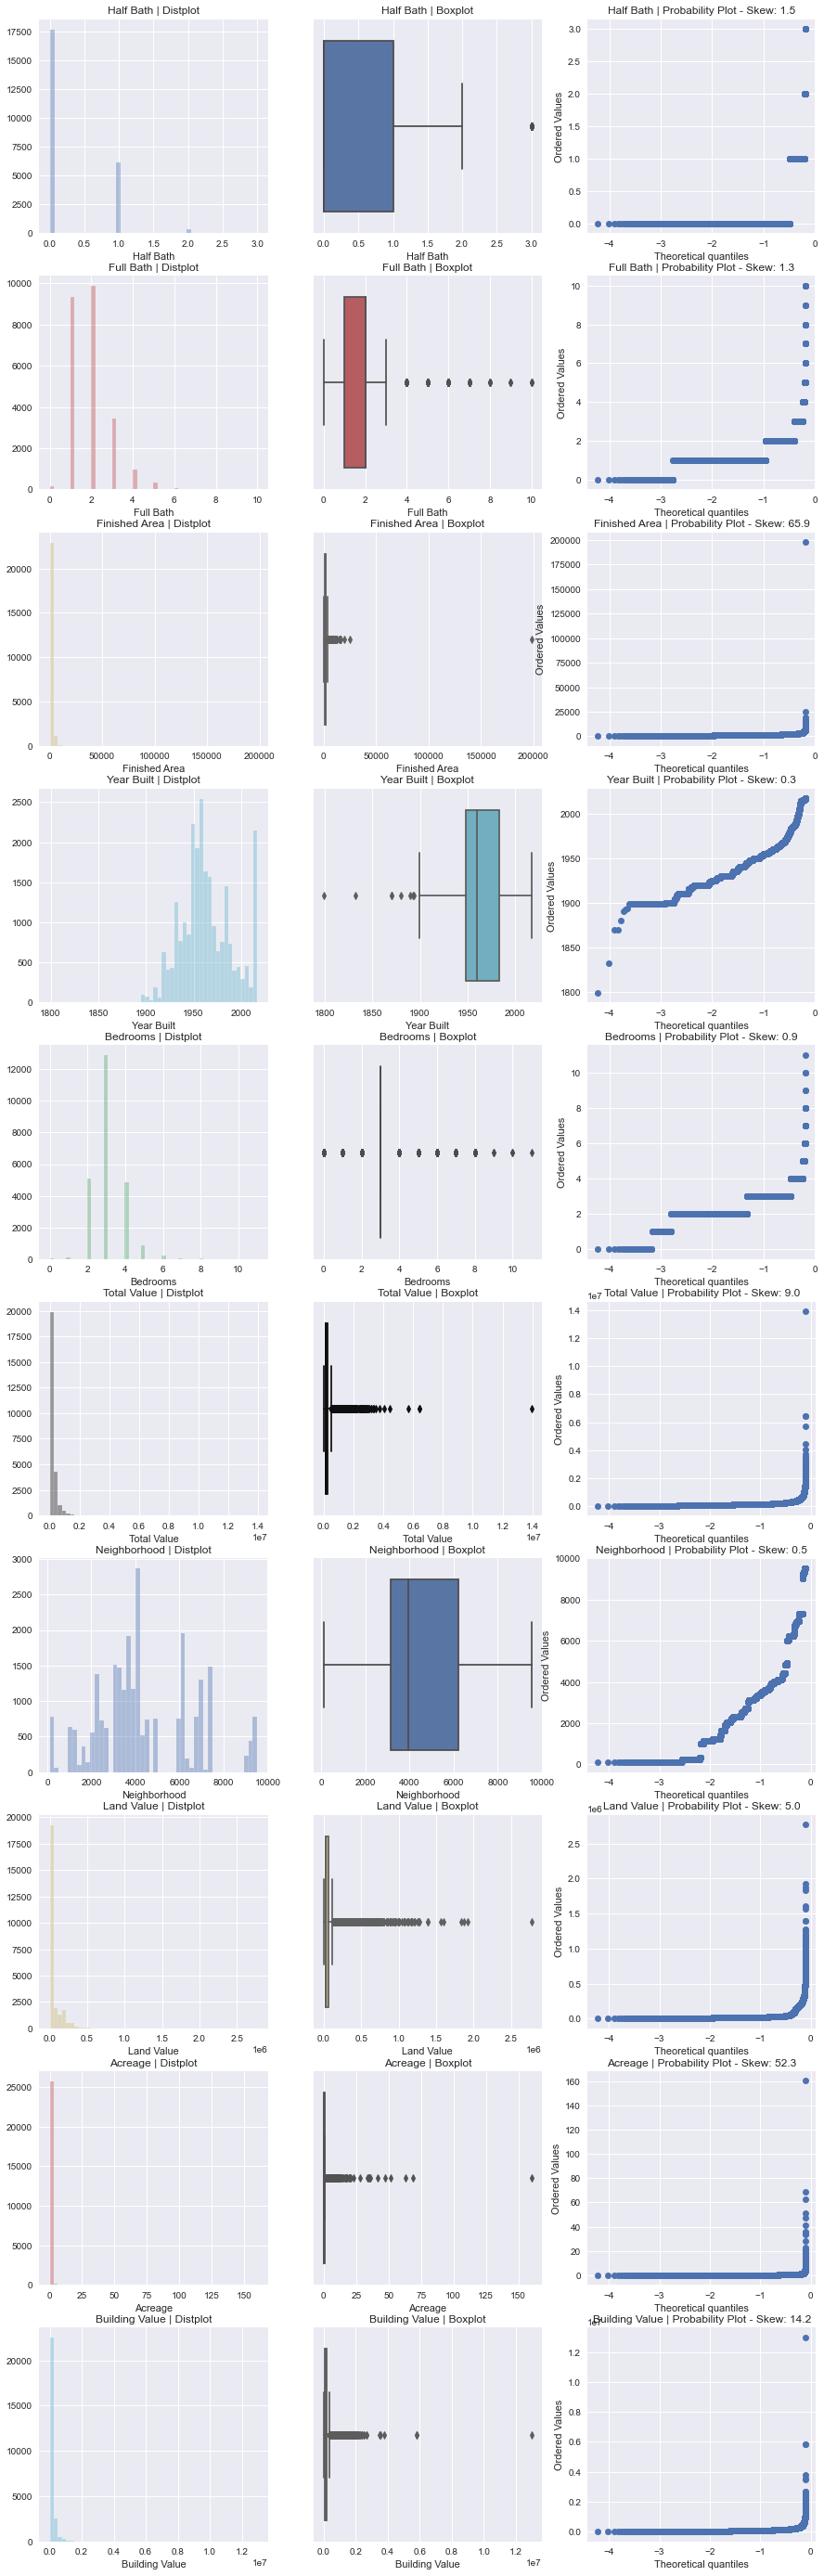

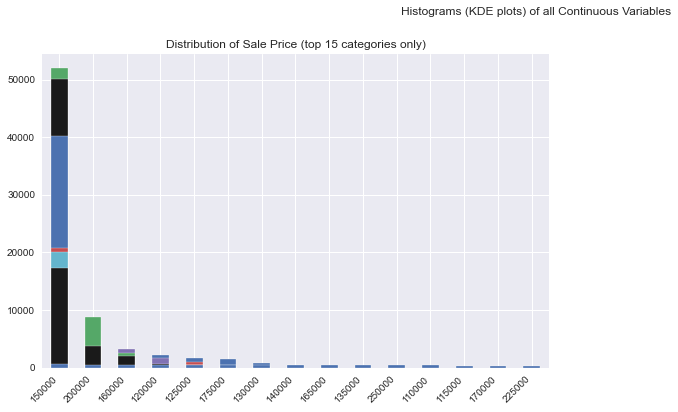

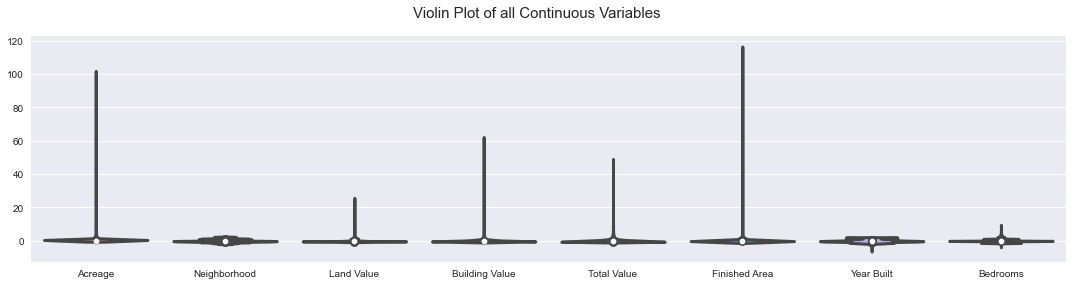

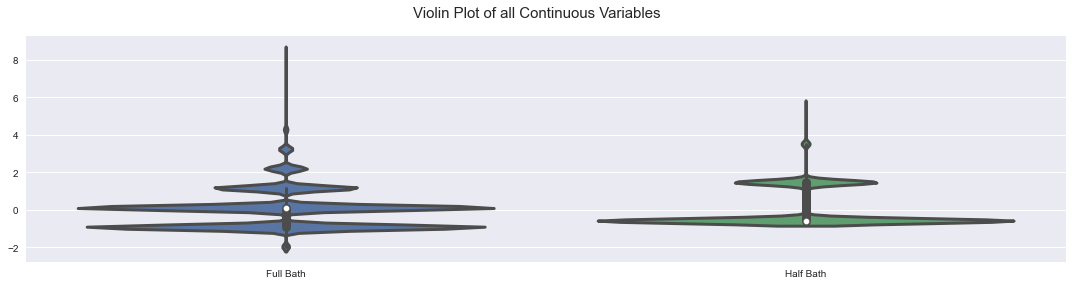

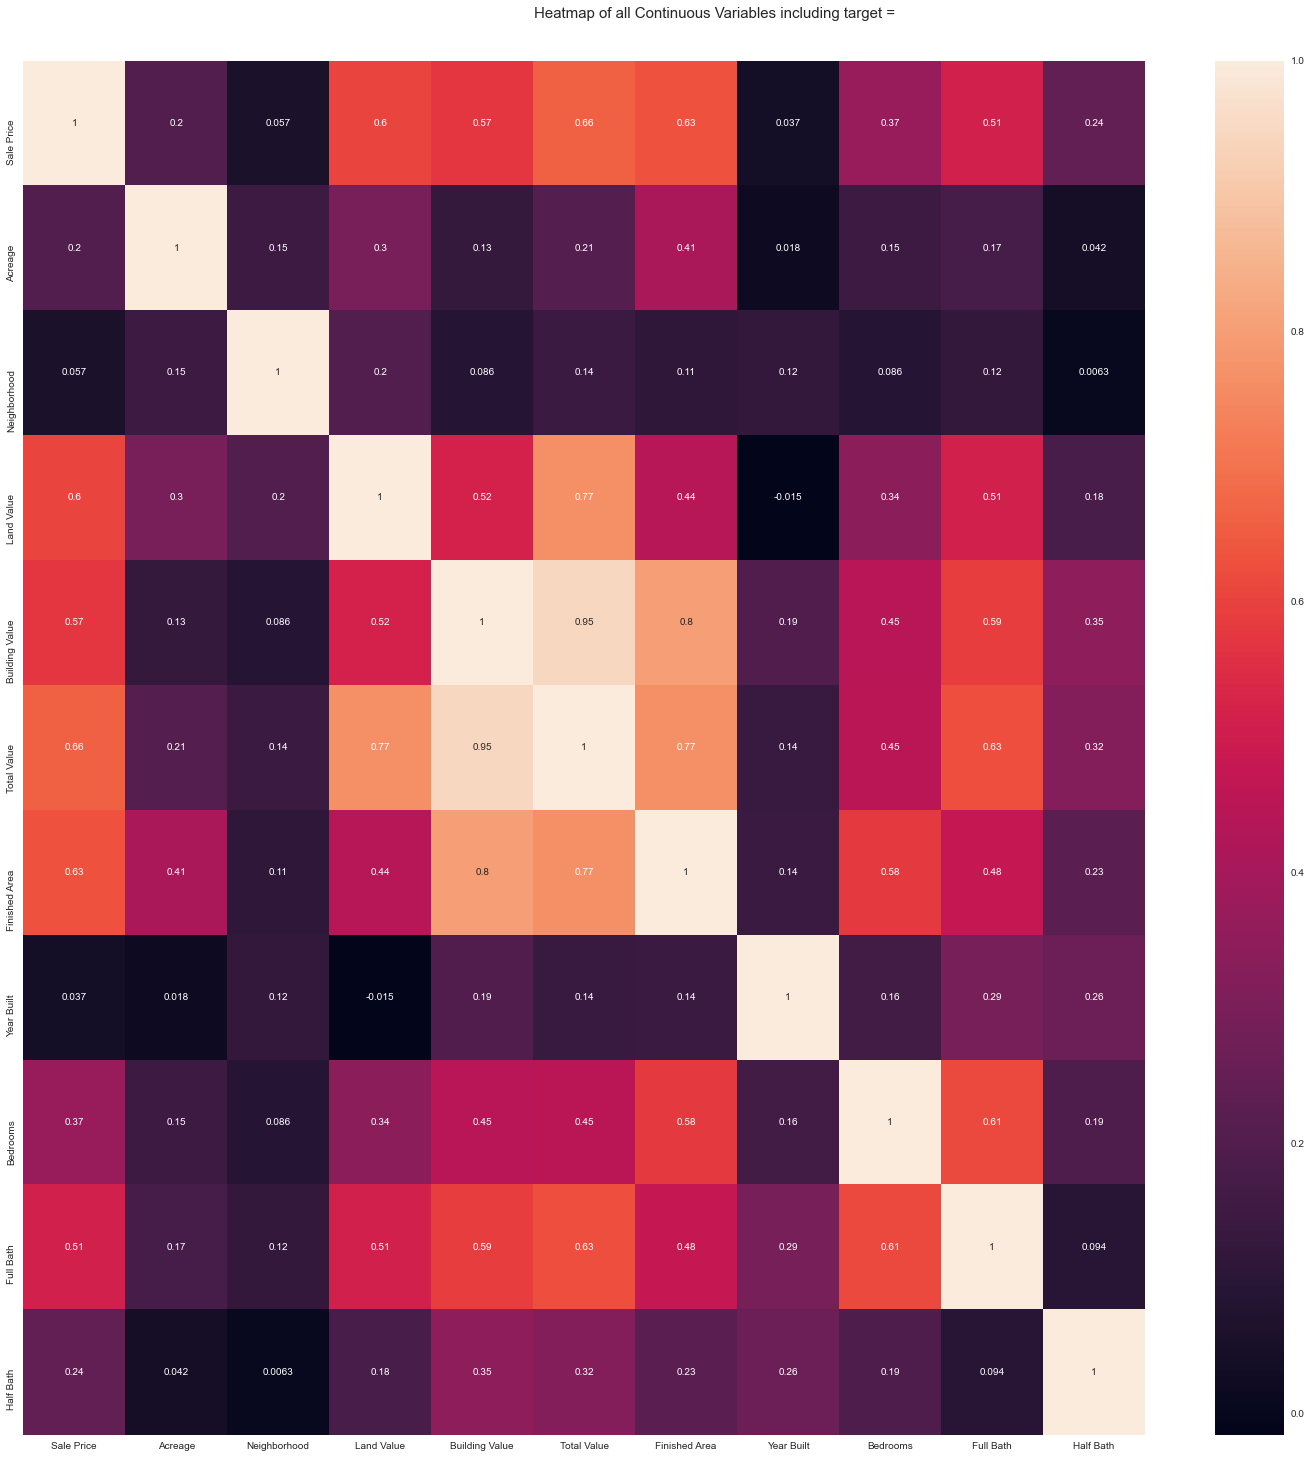

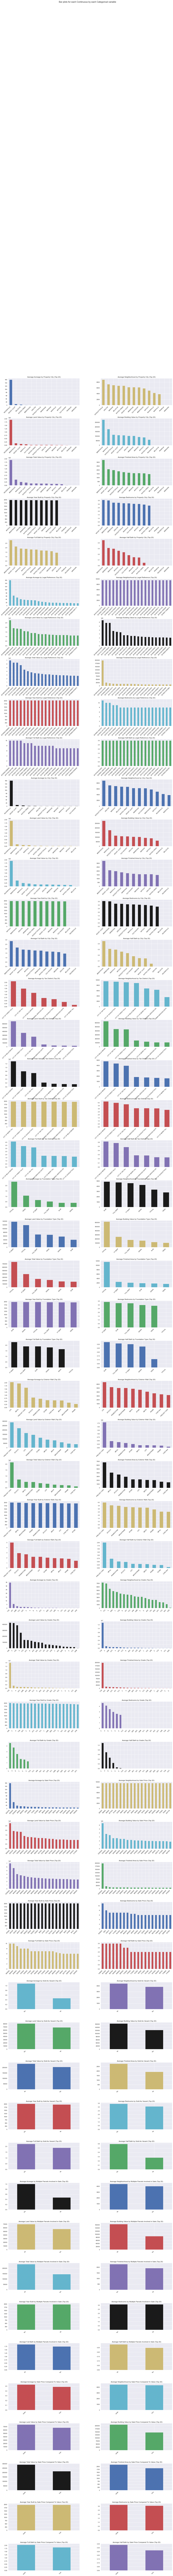

Time to run AutoViz (in seconds) = 56.574

 ###################### VISUALIZATION Completed ########################


,Property City,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,...,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,NASHVILLE,132000,20130128-0008725,No,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Over
1,NASHVILLE,191500,20130118-0006337,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,...,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,Over
2,NASHVILLE,202000,20130124-0008033,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126.0,34000.0,...,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,Over
3,NASHVILLE,32000,20130128-0008863,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,...,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,Under
4,NASHVILLE,102000,20130131-0009929,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,...,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,Under
5,NASHVILLE,93736,20130118-0006110,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,...,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,Under
6,NASHVILLE,64900,20130109-0002881,No,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Over
7,NASHVILLE,44000,20130115-0004888,No,No,NASHVILLE,0.20,URBAN SERVICES DISTRICT,3179.0,16000.0,...,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,Under
8,NASHVILLE,49900,20130128-0008950,No,No,NASHVILLE,0.20,URBAN SERVICES DISTRICT,3179.0,16000.0,...,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,Under
9,NASHVILLE,25000,20130111-0003850,No,No,NASHVILLE,0.40,URBAN SERVICES DISTRICT,3131.0,25000.0,...,88400.0,1152.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,Under


In [5]:
AV = AutoViz_Class()
AV.AutoViz('Nashville_housing_data_2013_2016.csv', sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=50)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Suite/ Condo   #                     50527
Half Bath                            32490
Bedrooms                             32477
Foundation Type                      32472
Grade                                32471
Exterior Wall                        32471
Year Built                           32471
Finished Area                        32470
Full Bath                            32359
Owner Name                           31375
image                                31301
Land Value                           30619
Neighborhood                         30619
Tax District                         30619
Acreage                              30619
Building Value                       30619
City                                 30619
Address                              30619
Total Value                          30619
State                                30619
Property City                          159
Property Address                       159
Unnamed: 0                               0
Parcel ID  

In [7]:
df.isna().sum().sort_values(ascending=False)

Suite/ Condo   #                     50527
Half Bath                            32490
Bedrooms                             32477
Foundation Type                      32472
Grade                                32471
Exterior Wall                        32471
Year Built                           32471
Finished Area                        32470
Full Bath                            32359
Owner Name                           31375
image                                31301
Land Value                           30619
Neighborhood                         30619
Tax District                         30619
Acreage                              30619
Building Value                       30619
City                                 30619
Address                              30619
Total Value                          30619
State                                30619
Property City                          159
Property Address                       159
Unnamed: 0                               0
Parcel ID  

In [8]:
df1 = df.drop(['Column1', 'Unnamed: 0', 'Parcel ID', 'Suite/ Condo   #', 'image', 'Owner Name', 'Property Address', 'Property City', 'Address', 'State', 'Legal Reference', 'Sale Date', 'Sale Price'], axis =1)

In [9]:
df2 = df1.dropna(subset=['Half Bath', 'Bedrooms', 'Foundation Type', 'Year Built', 'Finished Area', 'Full Bath', 'City'], axis = 0)

In [10]:
df2.isnull().sum().sort_values(ascending=False)

Sale Price Compared To Value         0
Building Value                       0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
City                                 0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Total Value                          0
Half Bath                            0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Land Use                             0
dtype: int64

In [11]:
df2['Land Use'] = le.fit_transform(df2['Land Use'])
df2['Sold As Vacant'] = le.fit_transform(df2['Sold As Vacant'])
df2['Multiple Parcels Involved in Sale'] = le.fit_transform(df2['Multiple Parcels Involved in Sale'])
df2['City'] = le.fit_transform(df2['City'])
df2['Exterior Wall'] = le.fit_transform(df2['Exterior Wall'])
df2['Grade'] = le.fit_transform(df2['Grade'])
df2['Sale Price Compared To Value'] = le.fit_transform(df2['Sale Price Compared To Value'])
df2['Foundation Type'] = le.fit_transform(df2['Foundation Type'])
df2['Tax District'] = le.fit_transform(df2['Tax District'])

In [12]:
df2.astype({'Neighborhood': 'int64', 'Land Value': 'int64', 'Building Value': 'int64', 'Total Value': 'int64', 'Year Built': 'int64'}).dtypes

Land Use                               int32
Sold As Vacant                         int32
Multiple Parcels Involved in Sale      int32
City                                   int32
Acreage                              float64
Tax District                           int32
Neighborhood                           int64
Land Value                             int64
Building Value                         int64
Total Value                            int64
Finished Area                        float64
Foundation Type                        int32
Year Built                             int64
Exterior Wall                          int32
Grade                                  int32
Bedrooms                             float64
Full Bath                            float64
Half Bath                            float64
Sale Price Compared To Value           int32
dtype: object

In [13]:
for c in ['Land Use', 'Sold As Vacant', 'Tax District', 'Exterior Wall', 'Full Bath', 'Half Bath']:
    df2[c].replace('NA', df2[c].mode()[0], inplace = True)

In [14]:
for i in ['Land Use', 'Acreage', 'Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath', 'Neighborhood', 'Land Value', 'Building Value', 'Total Value', 'Year Built']:
    df2[i] = df2[i].fillna(0).astype(np.int64)

In [15]:
for i in ['Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'Tax District', 'Exterior Wall', 'Grade']:
    df2[i] = df2[i].fillna(0).astype(np.int32)

In [16]:
df2.dtypes

Land Use                             int64
Sold As Vacant                       int32
Multiple Parcels Involved in Sale    int32
City                                 int32
Acreage                              int64
Tax District                         int32
Neighborhood                         int64
Land Value                           int64
Building Value                       int64
Total Value                          int64
Finished Area                        int64
Foundation Type                      int32
Year Built                           int64
Exterior Wall                        int32
Grade                                int32
Bedrooms                             int64
Full Bath                            int64
Half Bath                            int64
Sale Price Compared To Value         int32
dtype: object

In [17]:
df2.describe()

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
count,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,2.401300e+04,2.401300e+04,2.401300e+04,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000,24013.000000
mean,17.738017,0.018407,0.026069,6.246783,0.140757,5.625703,4424.299629,6.894307e+04,1.722933e+05,2.438901e+05,1914.895973,0.829759,1963.658019,1.411402,3.152001,3.091076,1.892725,0.285512,0.259401
std,3.149734,0.134420,0.159344,1.931825,0.760518,0.910308,2138.153671,1.018873e+05,1.927297e+05,2.711689e+05,1103.552005,1.321664,26.441126,1.726304,2.054087,0.851986,0.954392,0.488777,0.438315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,1.000000e+02,1.400000e+03,1.260000e+04,450.000000,0.000000,1799.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,7.000000,0.000000,6.000000,3130.000000,2.190000e+04,8.350000e+04,1.094000e+05,1236.000000,0.000000,1948.000000,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000
50%,18.000000,0.000000,0.000000,7.000000,0.000000,6.000000,4026.000000,2.990000e+04,1.171000e+05,1.542000e+05,1630.000000,0.000000,1960.000000,1.000000,3.000000,3.000000,2.000000,0.000000,0.000000
75%,18.000000,0.000000,0.000000,7.000000,0.000000,6.000000,6229.000000,6.030000e+04,1.885000e+05,2.778000e+05,2211.000000,1.000000,1983.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000
max,25.000000,1.000000,1.000000,9.000000,47.000000,6.000000,9530.000000,1.869000e+06,5.824300e+06,6.402600e+06,19728.000000,5.000000,2017.000000,9.000000,16.000000,11.000000,10.000000,3.000000,1.000000


In [52]:
df2.head(20)

,Land Use,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
1,18,0,0,7,0,6,3127,32000,134400,168300,1149,3,1941,0,3,2,1,0,0
2,18,0,0,7,0,1,9126,34000,157800,191800,2090,4,2000,1,3,3,2,1,0
3,18,0,0,7,0,6,3130,25000,243700,268700,2145,1,1948,1,2,4,2,0,1
4,18,0,0,7,0,6,3130,25000,138100,164800,1969,0,1910,3,3,2,1,0,1
5,18,0,0,7,0,6,3130,25000,86100,113300,1037,0,1945,3,3,2,1,0,1
7,18,0,0,7,0,6,3179,16000,68100,84300,1216,0,1932,3,4,2,1,0,1
8,18,0,0,7,0,6,3179,16000,68100,84300,1216,0,1932,3,4,2,1,0,1
9,18,0,0,7,0,6,3131,25000,57100,88400,1152,0,1945,3,3,2,1,0,1
10,18,0,0,7,0,6,3131,25000,80100,105100,1300,0,1955,0,3,2,1,0,1
11,18,0,0,7,0,6,3926,21500,87900,109400,1175,0,1968,0,3,3,1,1,1


In [19]:
df2.columns

Index(['Land Use', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',
       'City', 'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Total Value', 'Finished Area', 'Foundation Type',
       'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath',
       'Half Bath', 'Sale Price Compared To Value'],
      dtype='object')

In [20]:
X = df2.drop(['Sale Price Compared To Value'],axis=1)
y = df2[['Sale Price Compared To Value']]

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10086)

In [22]:
# LR

LRstart_time = datetime.now()
logRegModel = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
logRegModel.score(X_train, y_train)
y_predict = logRegModel.predict(X_test)
lrcm = confusion_matrix(y_test,y_predict)

print('Speed:', datetime.now() - LRstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, y_predict))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, logRegModel.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(lrcm))
print("Classification Report:")
print(classification_report(y_test, y_predict))

Speed: 0:00:00.109096
Accuracy: 0.7351655215490318
Precision: 0.66
Recall: 0.02562111801242236
Mean Squared Error: 0.26483447845096814
ROC AUC Score: 0.5693185688255056
Confusion Matrix:
      0   1
0  3498  17
1  1255  33
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3515
           1       0.66      0.03      0.05      1288

    accuracy                           0.74      4803
   macro avg       0.70      0.51      0.45      4803
weighted avg       0.72      0.74      0.63      4803



<AxesSubplot:>

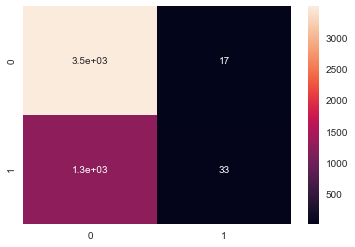

In [23]:
lrc = sns.heatmap(lrcm, annot=True)
lrc

In [24]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.543294
         Iterations 7
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                19210
Model:                                    Logit   Df Residuals:                    19192
Method:                                     MLE   Df Model:                           17
Date:                          Sat, 04 Dec 2021   Pseudo R-squ.:                 0.04705
Time:                                  15:10:37   Log-Likelihood:                -10437.
converged:                                 True   LL-Null:                       -10952.
Covariance Type:                      nonrobust   LLR p-value:                2.565e-208
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [25]:
print(result.pvalues)

Land Use                             8.327844e-01
Sold As Vacant                       5.328856e-55
Multiple Parcels Involved in Sale    2.491254e-04
City                                 2.253987e-08
Acreage                              9.179364e-02
Tax District                         1.449216e-14
Neighborhood                         1.391326e-02
Land Value                           5.916719e-01
Building Value                       2.665862e-01
Total Value                          6.059469e-01
Finished Area                        6.968329e-01
Foundation Type                      2.455667e-01
Year Built                           3.740352e-01
Exterior Wall                        9.660985e-01
Grade                                1.408498e-01
Bedrooms                             4.215439e-01
Full Bath                            9.555904e-02
Half Bath                            4.780070e-01
dtype: float64


In [26]:
logRegImp = logRegModel.coef_[0]
logRegImp

array([-4.60167095e-06,  4.38747028e-07, -1.85567249e-08, -1.57150384e-06,
        2.94531177e-07, -3.03787397e-06,  1.88167806e-07,  5.36267349e-07,
        3.81905931e-06, -2.14450699e-06,  4.35079697e-05, -4.91263294e-07,
       -6.75265222e-04, -2.55600098e-07, -1.18936335e-06, -7.87852179e-07,
       -2.19980994e-08,  1.01852042e-07])

In [27]:
for i,v in enumerate(logRegImp):
    print('Feature: %0d, Score: %.9f' % (i,v))

Feature: 0, Score: -0.000004602
Feature: 1, Score: 0.000000439
Feature: 2, Score: -0.000000019
Feature: 3, Score: -0.000001572
Feature: 4, Score: 0.000000295
Feature: 5, Score: -0.000003038
Feature: 6, Score: 0.000000188
Feature: 7, Score: 0.000000536
Feature: 8, Score: 0.000003819
Feature: 9, Score: -0.000002145
Feature: 10, Score: 0.000043508
Feature: 11, Score: -0.000000491
Feature: 12, Score: -0.000675265
Feature: 13, Score: -0.000000256
Feature: 14, Score: -0.000001189
Feature: 15, Score: -0.000000788
Feature: 16, Score: -0.000000022
Feature: 17, Score: 0.000000102


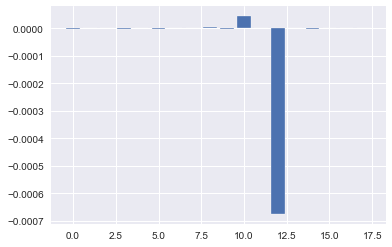

In [28]:
# plot feature importance
plt.bar([x for x in range(len(logRegImp))], logRegImp)
plt.show()

In [29]:
np.round(logRegModel.coef_, decimals=2) > 0

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]])

In [30]:
LRCols = X.columns

In [31]:
predictors = X_train
selector = RFE(logRegModel, n_features_to_select=1)
selector = selector.fit(predictors, y_train)

In [32]:
order = selector.ranking_
order

array([ 2, 11, 18,  8, 13,  1, 15, 12,  5,  6,  4, 10,  3, 14,  7,  9, 17,
       16])

In [33]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{i}. {df2.columns[i]}")
sorted(feature_ranks)

['1. Sold As Vacant',
 '10. Finished Area',
 '11. Foundation Type',
 '12. Year Built',
 '13. Exterior Wall',
 '14. Grade',
 '15. Bedrooms',
 '16. Full Bath',
 '17. Half Bath',
 '18. Sale Price Compared To Value',
 '2. Multiple Parcels Involved in Sale',
 '3. City',
 '4. Acreage',
 '5. Tax District',
 '6. Neighborhood',
 '7. Land Value',
 '8. Building Value',
 '9. Total Value']

In [34]:
df_cof_LR = pd.Series(logRegImp,LRCols)

<AxesSubplot:>

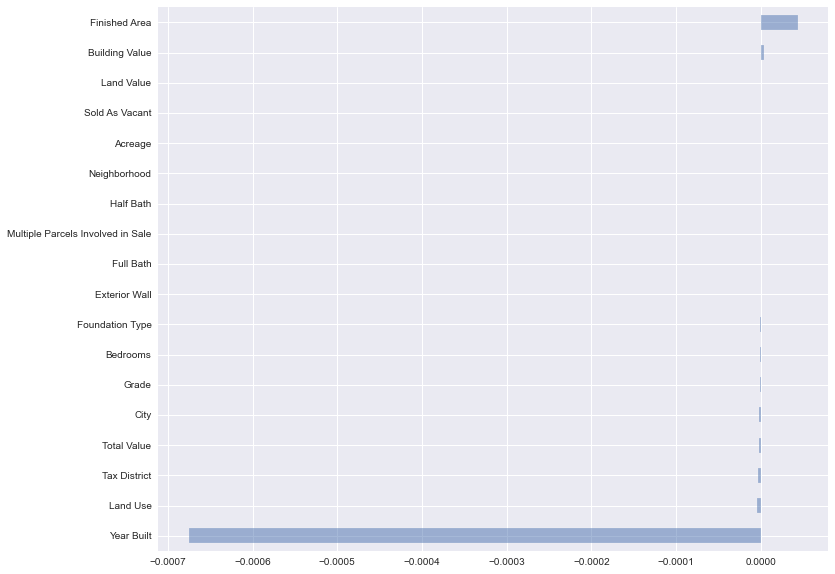

In [35]:
df_cof_LR.sort_values().plot(kind='barh', figsize=(12, 10), alpha=0.5)

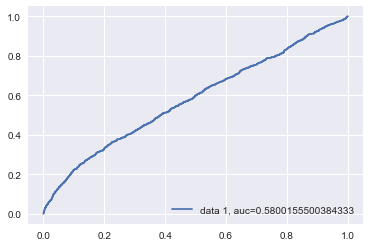

In [36]:
y_pred_proba = logRegModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
# DT
DTstart_time = datetime.now()

treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(X_train, y_train)
dty_predict = treemodel.predict(X_test)
dtcm = confusion_matrix(y_test,dty_predict)

print('Speed:', datetime.now() - DTstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, dty_predict))
print("Precision:",metrics.precision_score(y_test, dty_predict))
print("Recall:",metrics.recall_score(y_test, dty_predict))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, dty_predict))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, treemodel.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(dtcm))
print("Classification Report:")
print(classification_report(y_test, dty_predict))

Speed: 0:00:00.051899
Accuracy: 0.7551530293566521
Precision: 0.8888888888888888
Recall: 0.09937888198757763
Mean Squared Error: 0.2448469706433479
ROC AUC Score: 0.5937251238877639
Confusion Matrix:
      0    1
0  3499   16
1  1160  128
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3515
           1       0.89      0.10      0.18      1288

    accuracy                           0.76      4803
   macro avg       0.82      0.55      0.52      4803
weighted avg       0.79      0.76      0.67      4803



<AxesSubplot:>

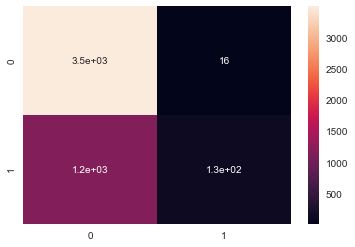

In [38]:
dtc = sns.heatmap(dtcm, annot=True)
dtc

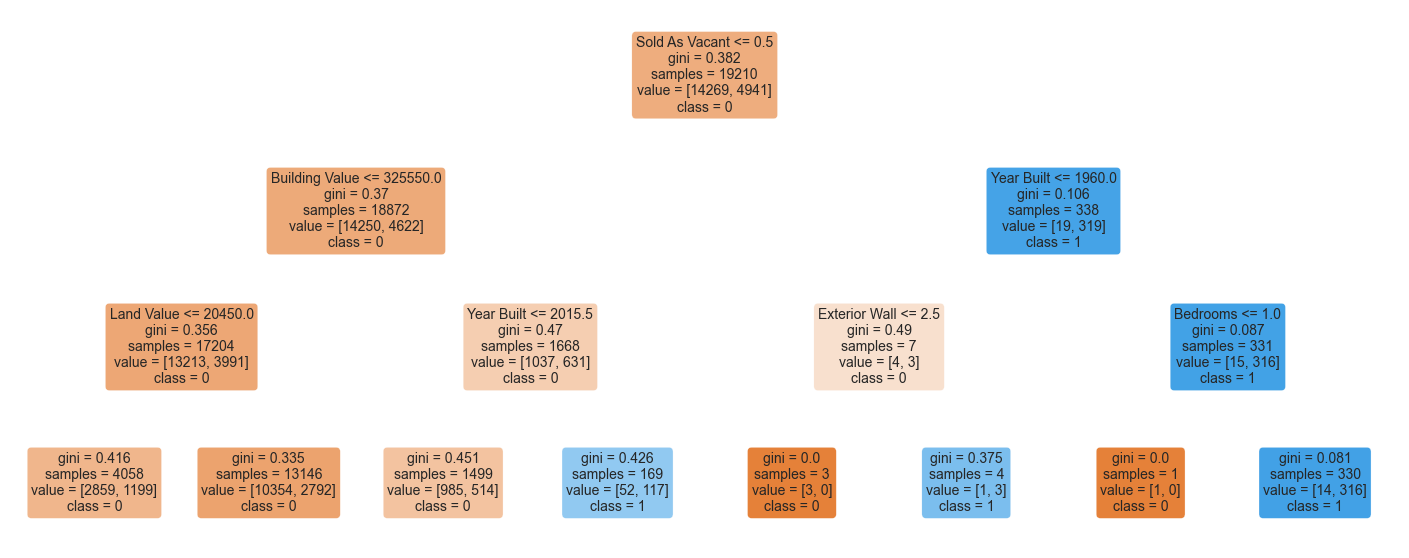

In [39]:
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=X.columns.values.tolist(),class_names=['0','1'],filled=True,rounded=True,fontsize=14)
plt.show()

In [40]:
dtimp = treemodel.feature_importances_
df_cof_DT = pd.Series(dtimp,X.columns)
df_cof_DT

Land Use                             0.000000
Sold As Vacant                       0.680131
Multiple Parcels Involved in Sale    0.000000
City                                 0.000000
Acreage                              0.000000
Tax District                         0.000000
Neighborhood                         0.000000
Land Value                           0.089758
Building Value                       0.136515
Total Value                          0.000000
Finished Area                        0.000000
Foundation Type                      0.000000
Year Built                           0.085717
Exterior Wall                        0.004044
Grade                                0.000000
Bedrooms                             0.003834
Full Bath                            0.000000
Half Bath                            0.000000
dtype: float64

<AxesSubplot:>

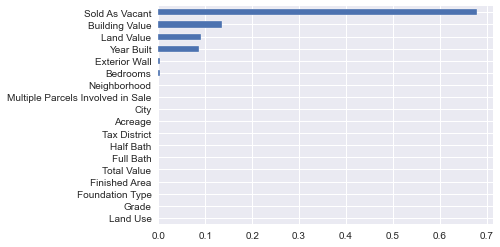

In [41]:
df_cof_DT.head(18).sort_values().plot.barh()

In [42]:
# RF
RFstart_time = datetime.now()

rfclass=RandomForestClassifier(n_estimators=20,random_state=0)
rfclass.fit(X_train, y_train)
rfypred=rfclass.predict(X_test)
rfclass.score(X_test, y_test)
rfcm = confusion_matrix(y_test,rfypred)

print('Speed:', datetime.now() - RFstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, rfypred))
print("Precision:",metrics.precision_score(y_test, rfypred))
print("Recall:",metrics.recall_score(y_test, rfypred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, rfypred))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, rfclass.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(rfcm))
print("Classification Report:")
print(classification_report(y_test, rfypred))

Speed: 0:00:00.755312
Accuracy: 0.728086612533833
Precision: 0.4868421052631579
Recall: 0.25854037267080743
Mean Squared Error: 0.271913387466167
ROC AUC Score: 0.9910072785563887
Confusion Matrix:
      0    1
0  3164  351
1   955  333
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      3515
           1       0.49      0.26      0.34      1288

    accuracy                           0.73      4803
   macro avg       0.63      0.58      0.58      4803
weighted avg       0.69      0.73      0.70      4803



<AxesSubplot:>

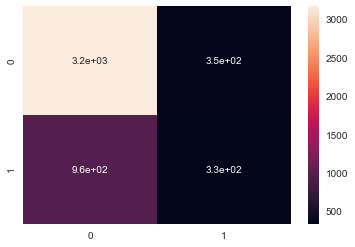

In [43]:
rfc = sns.heatmap(rfcm, annot=True)
rfc

In [44]:
rfimp = rfclass.feature_importances_
df_cof_RF = pd.Series(rfimp,X.columns)
df_cof_RF

Land Use                             0.023738
Sold As Vacant                       0.031422
Multiple Parcels Involved in Sale    0.006367
City                                 0.013679
Acreage                              0.008914
Tax District                         0.009442
Neighborhood                         0.076301
Land Value                           0.087220
Building Value                       0.160641
Total Value                          0.155307
Finished Area                        0.151830
Foundation Type                      0.031299
Year Built                           0.123091
Exterior Wall                        0.028066
Grade                                0.014706
Bedrooms                             0.033503
Full Bath                            0.026040
Half Bath                            0.018434
dtype: float64

<AxesSubplot:>

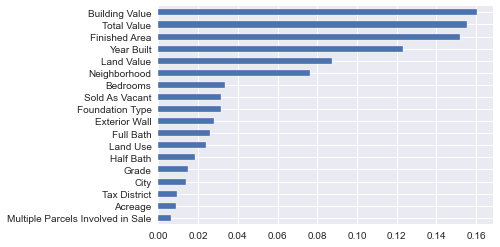

In [45]:
df_cof_RF = pd.Series(rfimp,X.columns)
df_cof_RF
df_cof_RF.head(18).sort_values().plot.barh()

In [46]:
# GBC
GBstart_time = datetime.now()

gbclass=GradientBoostingClassifier(random_state=0)
gbclass.fit(X_train, y_train)
gbypred=gbclass.predict(X_test)
gbclass.score(X_test, y_test)
gbcm = confusion_matrix(y_test,gbypred)

print('Speed:', datetime.now() - GBstart_time)
print("Accuracy:",metrics.accuracy_score(y_test, gbypred))
print("Precision:",metrics.precision_score(y_test, gbypred))
print("Recall:",metrics.recall_score(y_test, gbypred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, gbypred))
print("ROC AUC Score:", metrics.roc_auc_score(y_train, gbclass.predict_proba(X_train)[:, 1]))
print('Confusion Matrix:')
print(pd.DataFrame(gbcm))
print("Classification Report:")
print(classification_report(y_test, gbypred))

Speed: 0:00:03.102942
Accuracy: 0.7601499063085572
Precision: 0.8300970873786407
Recall: 0.1327639751552795
Mean Squared Error: 0.23985009369144286
ROC AUC Score: 0.6977989941410969
Confusion Matrix:
      0    1
0  3480   35
1  1117  171
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3515
           1       0.83      0.13      0.23      1288

    accuracy                           0.76      4803
   macro avg       0.79      0.56      0.54      4803
weighted avg       0.78      0.76      0.69      4803



<AxesSubplot:>

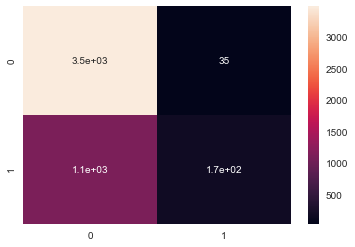

In [47]:
gbc = sns.heatmap(gbcm, annot=True)
gbc

In [48]:
gbimp = gbclass.feature_importances_
df_cof_GB = pd.Series(gbimp,X.columns)
df_cof_GB

Land Use                             0.071051
Sold As Vacant                       0.343394
Multiple Parcels Involved in Sale    0.023416
City                                 0.016364
Acreage                              0.012647
Tax District                         0.009209
Neighborhood                         0.041064
Land Value                           0.138680
Building Value                       0.116686
Total Value                          0.040267
Finished Area                        0.042640
Foundation Type                      0.004004
Year Built                           0.112666
Exterior Wall                        0.009346
Grade                                0.004800
Bedrooms                             0.005604
Full Bath                            0.007425
Half Bath                            0.000736
dtype: float64

<AxesSubplot:>

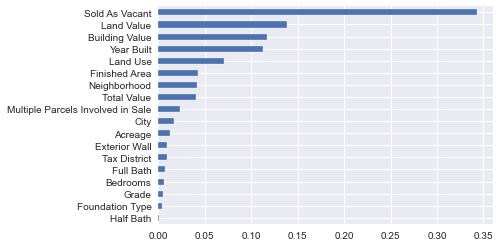

In [49]:
df_cof_GB.head(18).sort_values().plot.barh()